<a href="https://www.kaggle.com/code/sufiyakouser/simple-linear-regression-model?scriptVersionId=132666956" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-prediction-data-simple-linear-regression/Salary_Data.csv
/kaggle/input/salary-prediction-data-simple-linear-regression/Salary Data.csv


In [2]:
df = pd.read_csv("/kaggle/input/salary-prediction-data-simple-linear-regression/Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.isnull().sum() # the data does not have any null values

YearsExperience    0
Salary             0
dtype: int64

In [6]:
df.duplicated().sum() # the data does not have any duplicates

0

<Axes: xlabel='YearsExperience'>

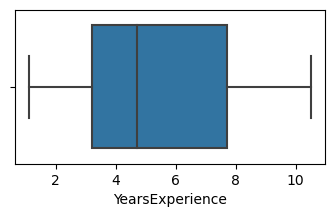

In [7]:
# outlier detection using boxplt

import matplotlib.pyplot as plt
import seaborn as sns 


# plt.boxplot(x = df['YearsExperience'])
# plt.show()
plt.figure(figsize = (4,2))
sns.boxplot(x = df['YearsExperience'])


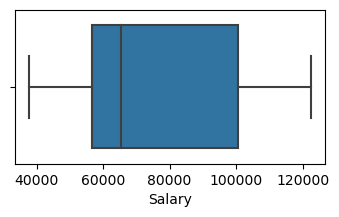

In [8]:
plt.figure(figsize = (4,2))
sns.boxplot(x = df['Salary'])
plt.show()

# there are no outliers

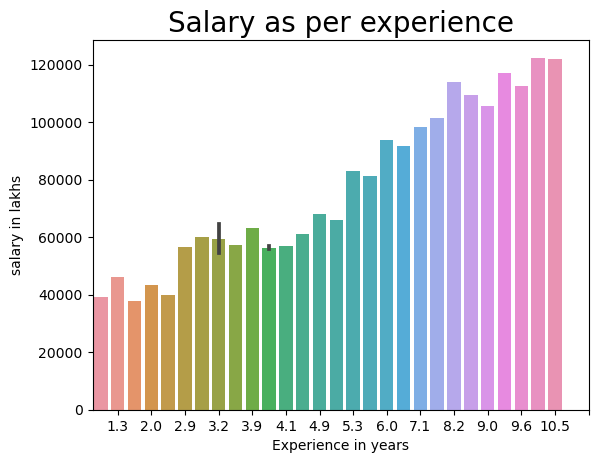

In [9]:
# data visulatization

sns.barplot(data = df, x = 'YearsExperience', y = 'Salary')
plt.xticks(range(1,30,2))
plt.title('Salary as per experience',fontdict= {'fontname':'Times New Roman','fontsize' :20})
plt.ylabel('salary in lakhs',fontdict= {'fontname':'Times New Roman','fontsize' :10})
plt.xlabel('Experience in years',fontdict= {'fontname':'Times New Roman','fontsize' :10})

plt.show()

# we can see that with the increase in experince the salary is also increased




([<matplotlib.axis.XTick at 0x7ed0deac5b40>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

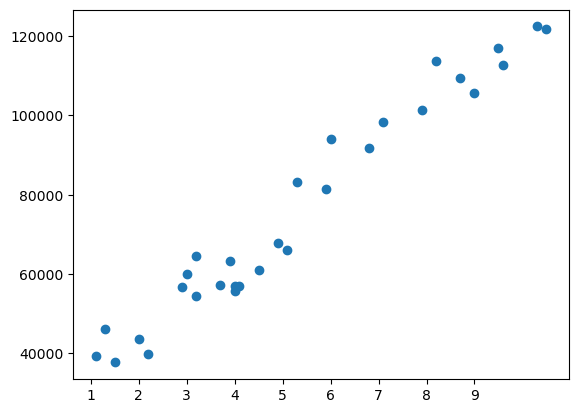

In [10]:
# scatter plot to check the linear relationship between salary and years of experience

plt.scatter(x = df['YearsExperience'],y = df['Salary'])
plt.xticks(range(1,10))

In [11]:
# build a linear regression model
# splitting the data into train and test

from sklearn.model_selection import train_test_split
x = df[['YearsExperience']]
y = df[['Salary']]
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.2,random_state = 10)

In [12]:
# training the model
from sklearn import linear_model

LR = linear_model.LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [13]:
y_pred = LR.predict(x_test)

In [14]:
y_pred

array([[89715.76498848],
       [56031.05821174],
       [53223.99931368],
       [40124.39112273],
       [44802.8226195 ],
       [92522.82388655]])

In [15]:
y_test

,Salary
20,91738.0
7,54445.0
5,56642.0
2,37731.0
3,43525.0
21,98273.0


In [16]:
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')


print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_pred) )

Mean absolute error: 2741.28
Residual sum of squares (MSE): 9785570.14
R2-score: 0.98
